In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Laden dataset
df = pd.read_csv('../../data/raw/export_insurance_portfolio_data_forecasting_2000_2025.csv')

In [ ]:
# Laat de eerste paar rijen van de dataset zien
df.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
0,200001,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200002,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200003,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200004,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,200005,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Bekijk de statistieken van de dataset
df.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,3387.000000,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3.387000e+03,3387.000000,3.387000e+03,3.387000e+03,3387.000000,3387.000000,3387.000000,3387.000000,3387.000000
mean,201844.194272,8830.269560,4.393535e+06,8874.757898,4.427187e+06,174.675229,9.230146e+04,108.630351,5.737173e+04,583.332448,2.875051e+05,2.964894e+05,310.985533,1.642907e+05,1.636598e+05,581.386599,582.724305,8984.295843,514.394707,532.779232
std,515.806873,15158.567392,7.008598e+06,15175.168543,7.033158e+06,435.781811,2.063735e+05,397.447403,1.875675e+05,998.387080,4.626515e+05,4.781926e+05,1273.184986,7.466712e+05,7.456852e+05,178.115680,177.849471,28945.323321,245.513206,260.012484
min,200001.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-95466.690000,0.000000,0.000000
25%,201602.000000,884.000000,5.890981e+05,957.000000,6.212164e+05,16.000000,1.084856e+04,2.000000,9.811250e+02,25.000000,1.438223e+04,1.470320e+04,27.000000,1.833024e+04,1.824310e+04,466.394480,467.044041,0.000000,428.245811,435.681161
50%,201909.000000,2964.000000,1.805004e+06,3008.000000,1.817904e+06,57.000000,3.351302e+04,30.000000,1.830424e+04,205.000000,1.155399e+05,1.193990e+05,83.000000,5.004794e+04,5.049404e+04,549.706030,551.269252,935.330000,523.160263,537.616369
75%,202211.000000,8642.000000,4.437527e+06,8679.000000,4.457773e+06,155.000000,8.757904e+04,85.000000,4.614188e+04,608.500000,3.168872e+05,3.234964e+05,223.000000,1.254480e+05,1.254900e+05,654.648526,656.813596,8337.950000,623.250998,651.052212
max,202512.000000,73031.000000,3.931488e+07,73031.000000,3.955505e+07,7263.000000,3.282298e+06,8831.000000,3.915997e+06,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1620.440000,1230.762600,340422.340000,1620.440000,1596.510000


In [ ]:
# Bekijk de datatypes en het aantal niet-nul waarden
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              3387 non-null   int64  
 1   Product                                 3359 non-null   str    
 2   Label_Naam                              3359 non-null   str    
 3   Beginstand                              3387 non-null   int64  
 4   Jaarpremie_Beginstand                   3387 non-null   float64
 5   Eindstand                               3387 non-null   int64  
 6   Jaarpremie_Eindstand                    3387 non-null   float64
 7   NewBusiness                             3387 non-null   int64  
 8   Jaarpremie_NewBusiness                  3387 non-null   float64
 9   Royementen                              3387 non-null   int64  
 10  Geroyeerde_Jaarpremie                   3387 non-null   float64
 11  Pr

In [46]:
# Filteren op rijen waar zowel Product als Label_Naam NULL (NaN) zijn
null_rows = df[df['Product'].isna() & df['Label_Naam'].isna()]
print(null_rows)

    Jaar_Maand Product Label_Naam  Beginstand  Jaarpremie_Beginstand  \
0       200001     NaN        NaN           0                    0.0   
1       200002     NaN        NaN           0                    0.0   
2       200003     NaN        NaN           0                    0.0   
3       200004     NaN        NaN           0                    0.0   
4       200005     NaN        NaN           0                    0.0   
5       200006     NaN        NaN           0                    0.0   
6       200007     NaN        NaN           0                    0.0   
7       200008     NaN        NaN           0                    0.0   
8       200009     NaN        NaN           0                    0.0   
9       200010     NaN        NaN           0                    0.0   
10      200011     NaN        NaN           0                    0.0   
11      200012     NaN        NaN           0                    0.0   
12      200101     NaN        NaN           0                   

In [47]:
# Verwijder rijen waar BEIDE kolommen (Product EN Label_Naam) NaN zijn
# 'how="all"' zorgt ervoor dat de rij alleen wordt verwijderd als beide velden leeg zijn.
df_cleaned = df.dropna(subset=['Product', 'Label_Naam'], how='all')

In [48]:
# Laat de datatypes zien van de eerste paar rijen van de opgeschoonde dataset.
df_cleaned.info()

<class 'pandas.DataFrame'>
RangeIndex: 3359 entries, 28 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              3359 non-null   int64  
 1   Product                                 3359 non-null   str    
 2   Label_Naam                              3359 non-null   str    
 3   Beginstand                              3359 non-null   int64  
 4   Jaarpremie_Beginstand                   3359 non-null   float64
 5   Eindstand                               3359 non-null   int64  
 6   Jaarpremie_Eindstand                    3359 non-null   float64
 7   NewBusiness                             3359 non-null   int64  
 8   Jaarpremie_NewBusiness                  3359 non-null   float64
 9   Royementen                              3359 non-null   int64  
 10  Geroyeerde_Jaarpremie                   3359 non-null   float64
 11  P

In [49]:
# Laat de eerste paar rijen van de opgeschoonde dataset zien
df_cleaned.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
28,201507,Auto Particulier,BCS Polis,50,29585.43,106,59337.54,56,28886.31,0,...,0.0,0.0,38,20242.19,21107.99,591.708600,559.788113,0.0,0.0,0.0
29,201508,Auto Particulier,BCS Polis,106,59337.54,168,91685.32,65,32911.85,1,...,0.0,0.0,46,21866.59,22007.44,559.788113,545.745952,0.0,0.0,0.0
30,201509,Auto Particulier,BCS Polis,168,91685.32,216,111434.76,54,23342.33,6,...,0.0,0.0,26,12065.70,13365.58,545.745952,515.901666,0.0,0.0,0.0
31,201510,Auto Particulier,BCS Polis,216,111434.76,265,133615.83,57,26433.61,6,...,0.0,0.0,45,23305.39,23313.57,515.901666,504.210679,0.0,0.0,0.0
32,201511,Auto Particulier,BCS Polis,265,133615.83,309,157925.46,49,26034.01,5,...,0.0,0.0,27,14114.42,14585.22,504.210679,511.085631,0.0,0.0,0.0


In [50]:
# Bekijk de statistieken van de opgeschoonde dataset
df_cleaned.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,3359.000000,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3.359000e+03,3359.000000,3.359000e+03,3.359000e+03,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000
mean,201858.922298,8903.877047,4.430158e+06,8948.736231,4.464091e+06,176.131289,9.307087e+04,109.535874,5.784997e+04,588.194999,2.899017e+05,2.989609e+05,313.577851,1.656602e+05,1.650240e+05,586.232930,587.581787,9059.187264,518.682606,537.220380
std,491.923490,15200.084541,7.026217e+06,15216.560761,7.050743e+06,437.301661,2.070592e+05,398.976661,1.882744e+05,1001.112982,4.638277e+05,4.794119e+05,1278.164016,7.496264e+05,7.486372e+05,170.727282,170.408805,29054.073282,241.980617,256.483194
min,200205.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-95466.690000,0.000000,0.000000
25%,201603.000000,967.500000,6.407122e+05,1000.000000,6.528575e+05,16.000000,1.132924e+04,2.000000,1.102465e+03,33.000000,1.947612e+04,1.981021e+04,28.000000,1.934254e+04,1.928118e+04,468.847975,469.279999,0.000000,432.097848,437.143710
50%,201909.000000,3018.000000,1.821564e+06,3048.000000,1.841239e+06,59.000000,3.386861e+04,30.000000,1.861390e+04,209.000000,1.165033e+05,1.208723e+05,86.000000,5.049940e+04,5.128122e+04,551.321426,552.242456,982.230000,524.793945,539.741607
75%,202212.000000,8700.000000,4.457773e+06,8746.500000,4.476919e+06,157.000000,8.816943e+04,86.000000,4.634481e+04,613.500000,3.179283e+05,3.250702e+05,226.000000,1.271890e+05,1.274914e+05,655.573579,657.581902,8447.990000,625.388389,653.324632
max,202512.000000,73031.000000,3.931488e+07,73031.000000,3.955505e+07,7263.000000,3.282298e+06,8831.000000,3.915997e+06,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1620.440000,1230.762600,340422.340000,1620.440000,1596.510000


In [ ]:
# Datum omzetten (formaat 200001 naar datetime) en voeg date kolom toe, belangrijk voor tijdreeksanalyse
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')
df_cleaned = df_cleaned.sort_values('date')

In [53]:
# Controleren of de datum correct is toegevoegd
df_cleaned.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie,date
1017,200205,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-05-01
1018,200206,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-06-01
1019,200207,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-07-01
1020,200208,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-08-01
1021,200209,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-09-01


In [54]:
# We focussen op de geaggregeerde data per maand voor de drie belangrijkste kolommen: Royementen, NewBusiness en Prolongaties.
ts_df = df_cleaned.groupby('date')[['Royementen', 'NewBusiness', 'Prolongaties']].sum()

Visualiseren van distributies...


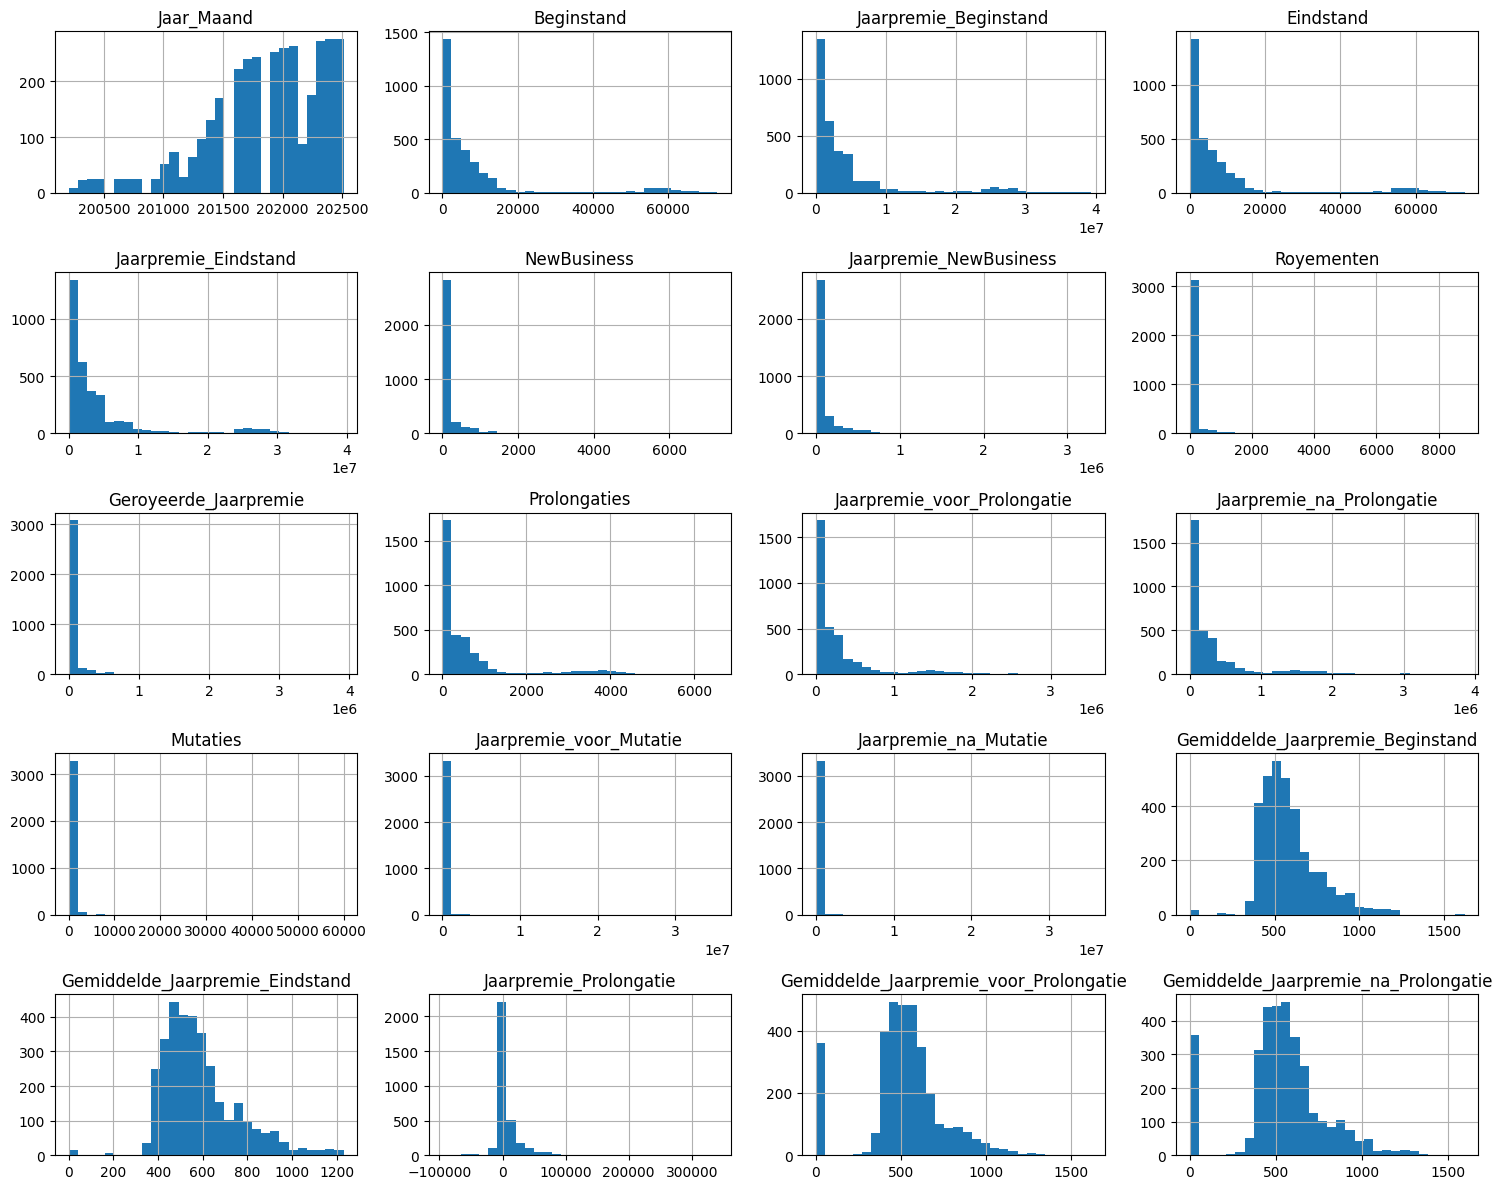

In [55]:
# Distributie van alle numerieke features
print("Visualiseren van distributies...")
df_cleaned.select_dtypes(include=[np.number]).hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

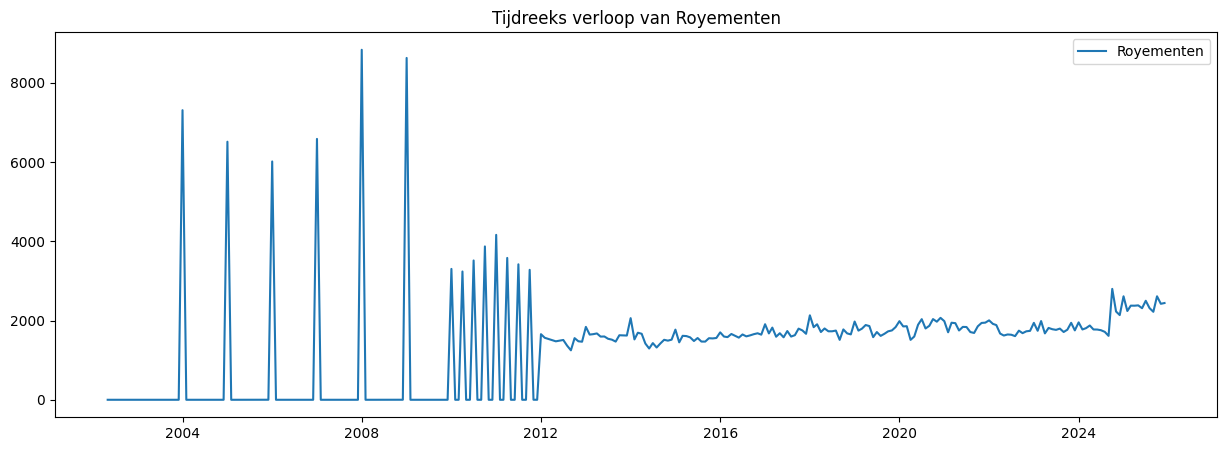

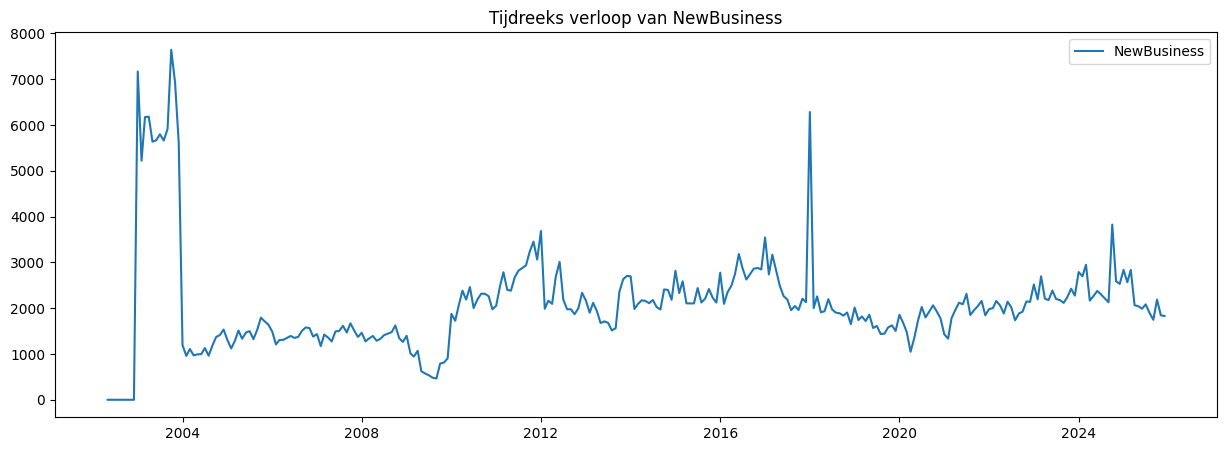

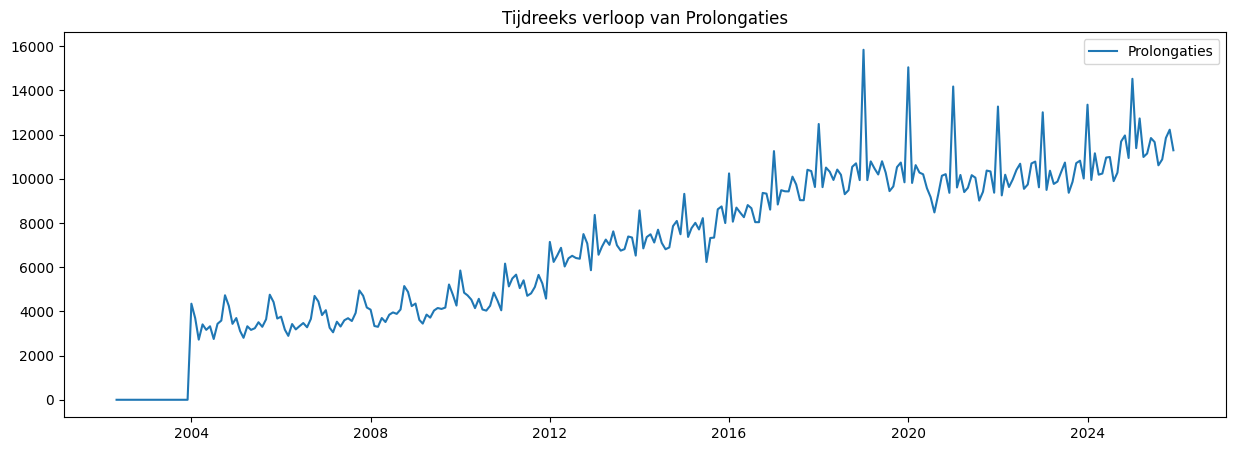

In [56]:
# Tijdreeks Analyse voor de 3 targets
targets = ['Royementen', 'NewBusiness', 'Prolongaties']

for target in targets:
    plt.figure(figsize=(15, 5))
    plt.plot(ts_df.index, ts_df[target], label=target)
    plt.title(f'Tijdreeks verloop van {target}')
    plt.legend()
    plt.show()

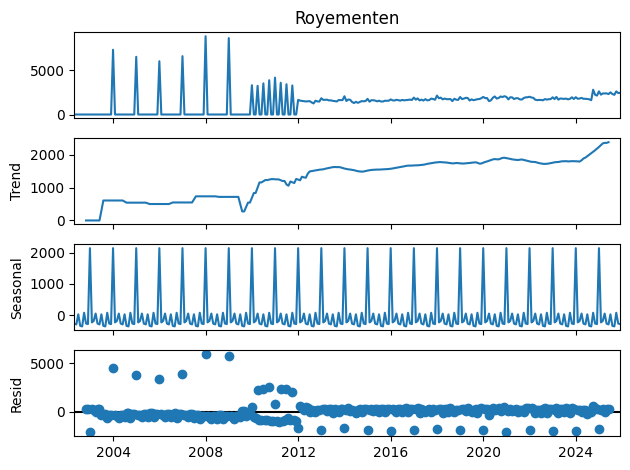

In [57]:
# Decompositie voor Royementen
result = seasonal_decompose(ts_df['Royementen'], model='additive', period=12)
result.plot()
plt.show()

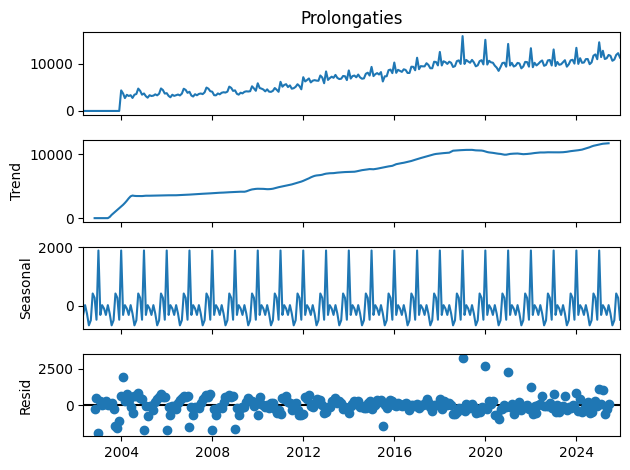

In [58]:
# Decompositie voor Prolongaties
result = seasonal_decompose(ts_df['Prolongaties'], model='additive', period=12)
result.plot()
plt.show()

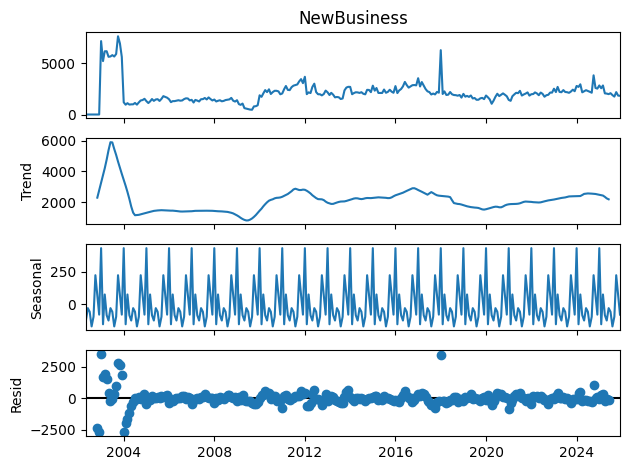

In [59]:
# Decompositie voor NewBusiness
result = seasonal_decompose(ts_df['NewBusiness'], model='additive', period=12)
result.plot()
plt.show()

In [60]:
# Stationariteit test (ADF-test) voor Royementen
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("De reeks is stationair (geen differencing nodig)")
    else:
        print("De reeks is NIET stationair (differencing nodig)")

print("Stationariteit test voor Royementen:")
check_stationarity(ts_df['Royementen'])

Stationariteit test voor Royementen:
ADF Statistic: -1.4311134153597356
p-value: 0.5672724437872594
De reeks is NIET stationair (differencing nodig)


In [61]:
# Stationariteit test (ADF-test) voor Prolongaties
print("Stationariteit test voor Prolongaties:")
check_stationarity(ts_df['Prolongaties'])

Stationariteit test voor Prolongaties:
ADF Statistic: -1.9147060996430796
p-value: 0.32517483665243574
De reeks is NIET stationair (differencing nodig)


In [62]:
# Stationariteit test (ADF-test) voor NewBusiness
print("Stationariteit test voor NewBusiness:")
check_stationarity(ts_df['NewBusiness'])

Stationariteit test voor NewBusiness:
ADF Statistic: -6.056187292015518
p-value: 1.243554234720514e-07
De reeks is stationair (geen differencing nodig)


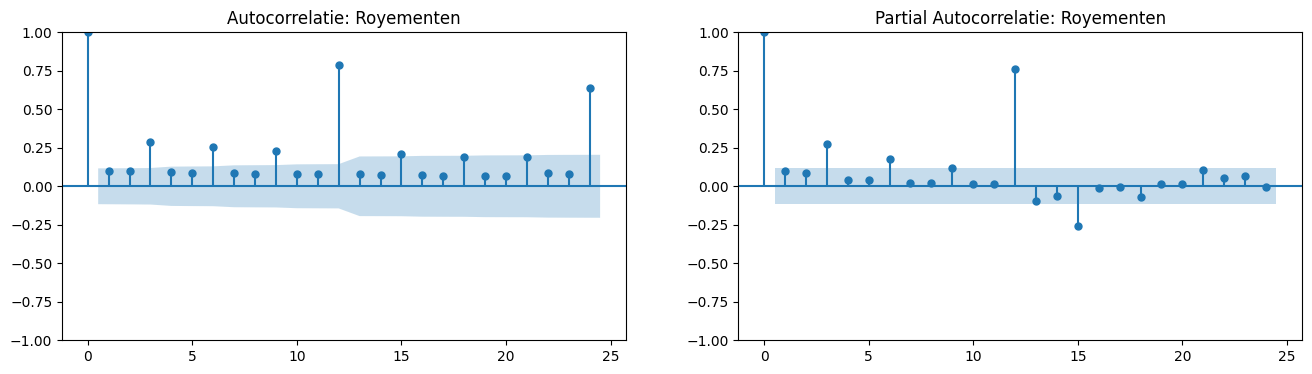

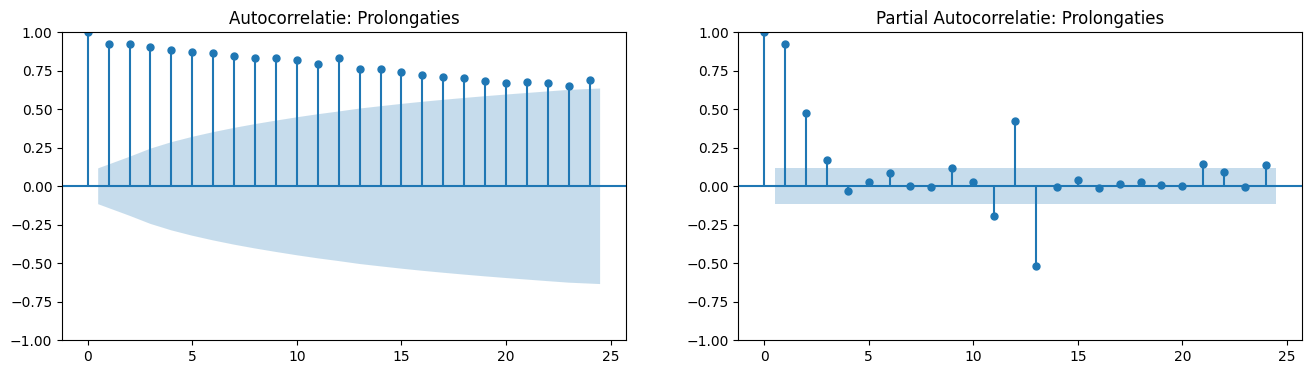

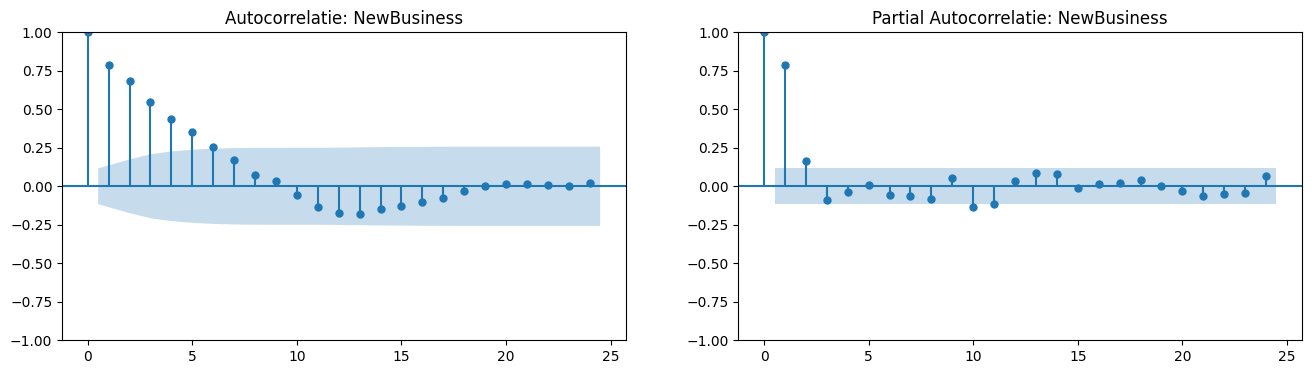

In [63]:
# Autocorrelatie (ACF en PACF)

# Royementen
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(ts_df['Royementen'], ax=axes[0], lags=24, title='Autocorrelatie: Royementen')
plot_pacf(ts_df['Royementen'], ax=axes[1], lags=24, title='Partial Autocorrelatie: Royementen')
plt.show()

# Prolongaties
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(ts_df['Prolongaties'], ax=axes[0], lags=24, title='Autocorrelatie: Prolongaties')
plot_pacf(ts_df['Prolongaties'], ax=axes[1], lags=24, title='Partial Autocorrelatie: Prolongaties')
plt.show()

# NewBusiness
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(ts_df['NewBusiness'], ax=axes[0], lags=24, title='Autocorrelatie: NewBusiness')
plot_pacf(ts_df['NewBusiness'], ax=axes[1], lags=24, title='Partial Autocorrelatie: NewBusiness')
plt.show()


--- Analyse voor: Royementen ---


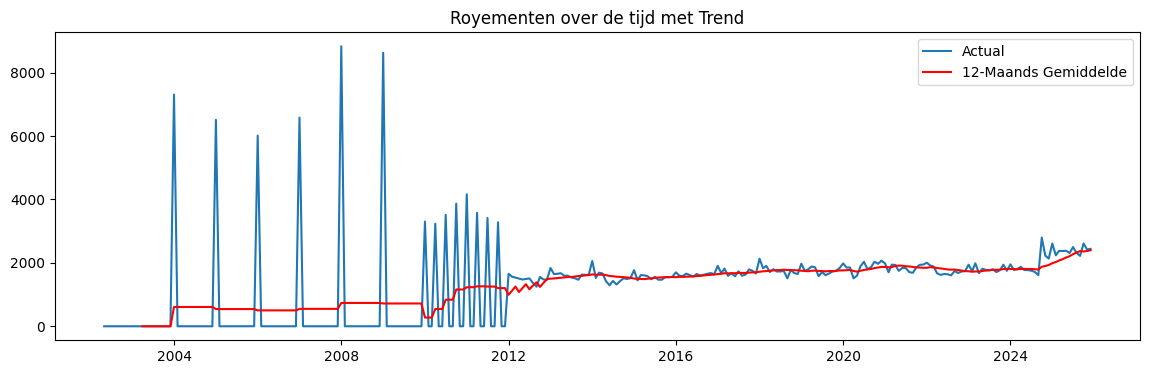

ADF Statistic: -1.431
p-waarde: 0.567
Status: Niet stationair (Je moet 'differencing' toepassen)


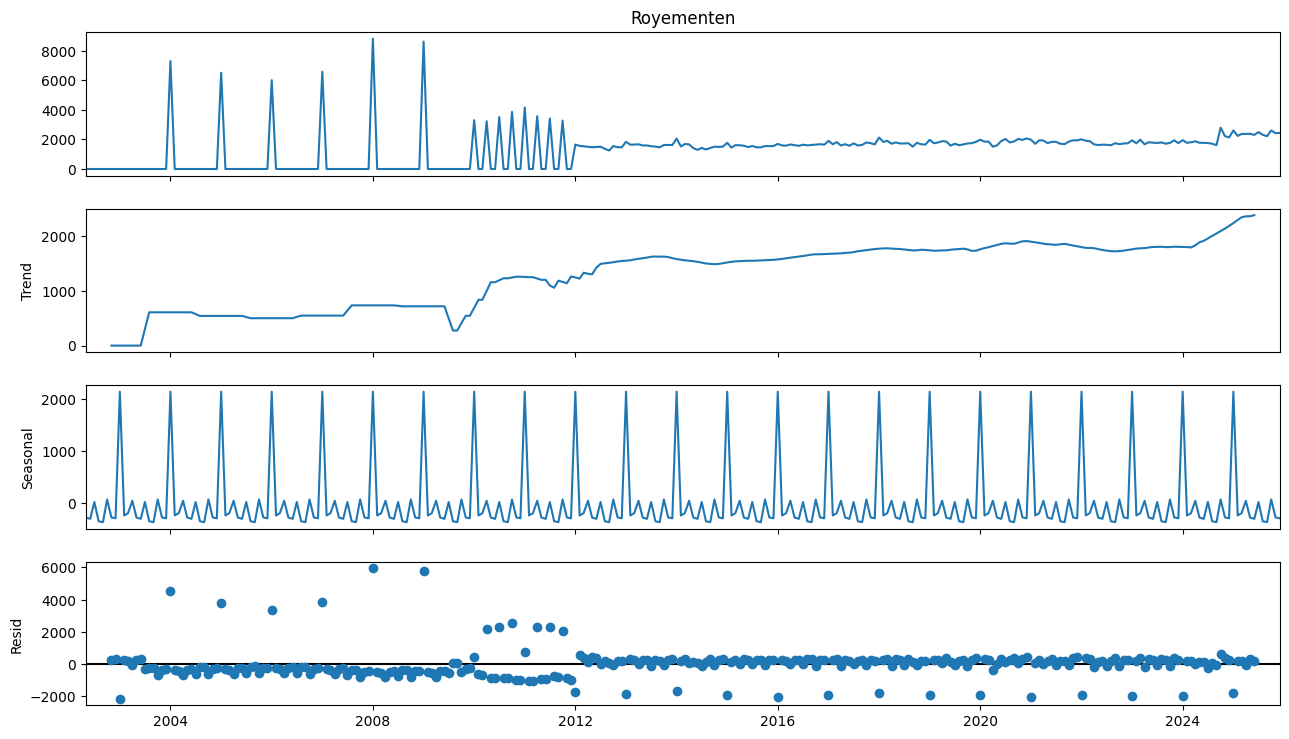

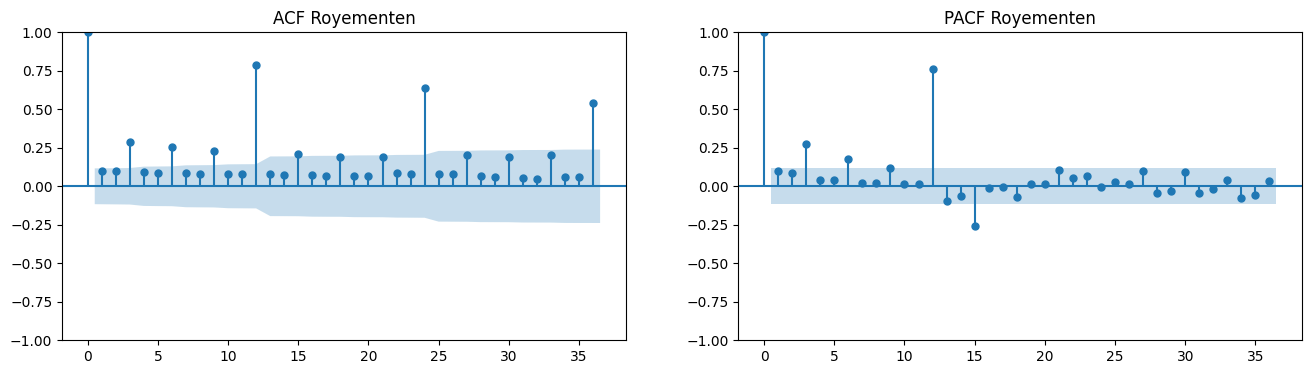


--- Analyse voor: NewBusiness ---


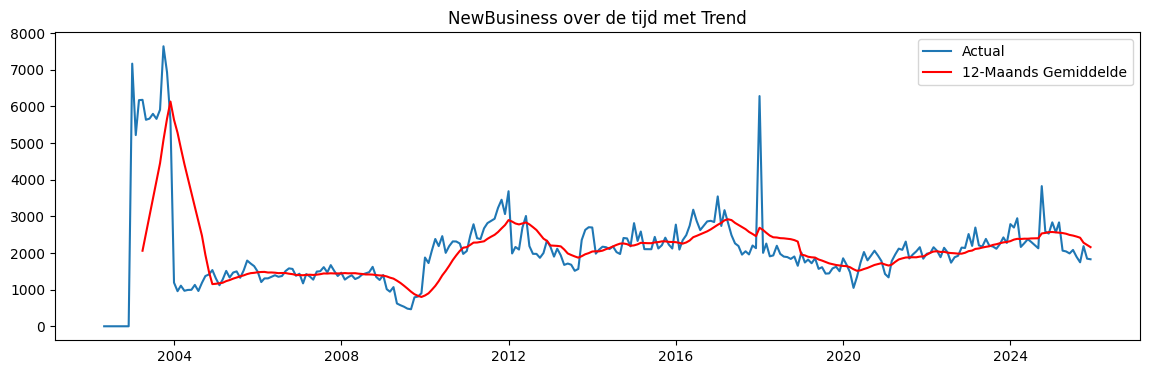

ADF Statistic: -6.056
p-waarde: 0.000
Status: Stationair (Klaar voor modellering)


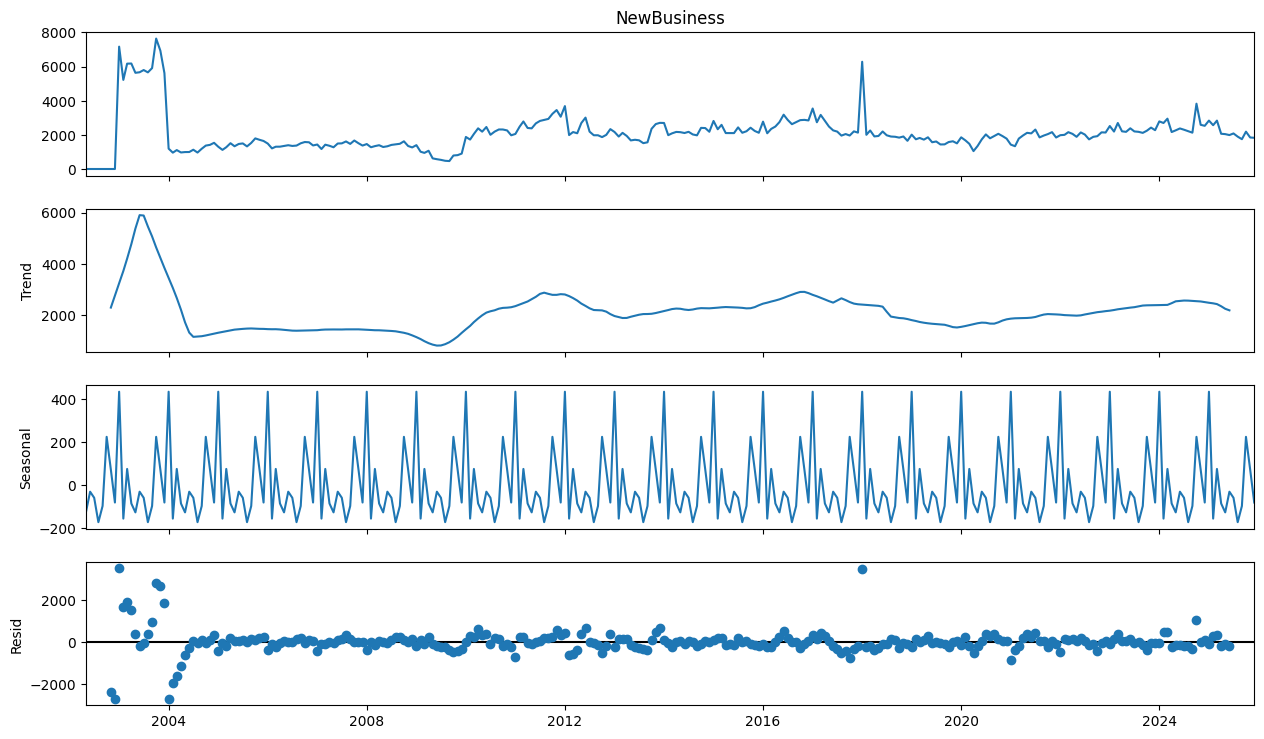

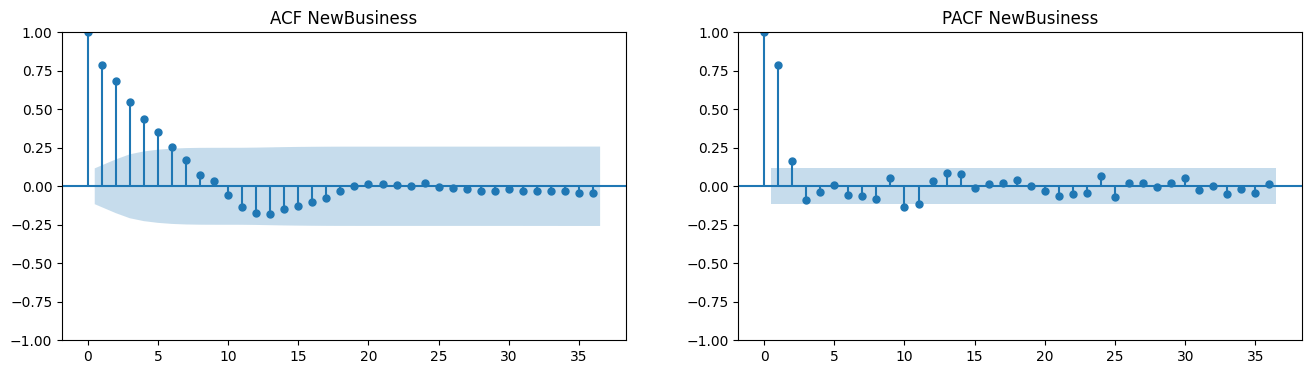


--- Analyse voor: Prolongaties ---


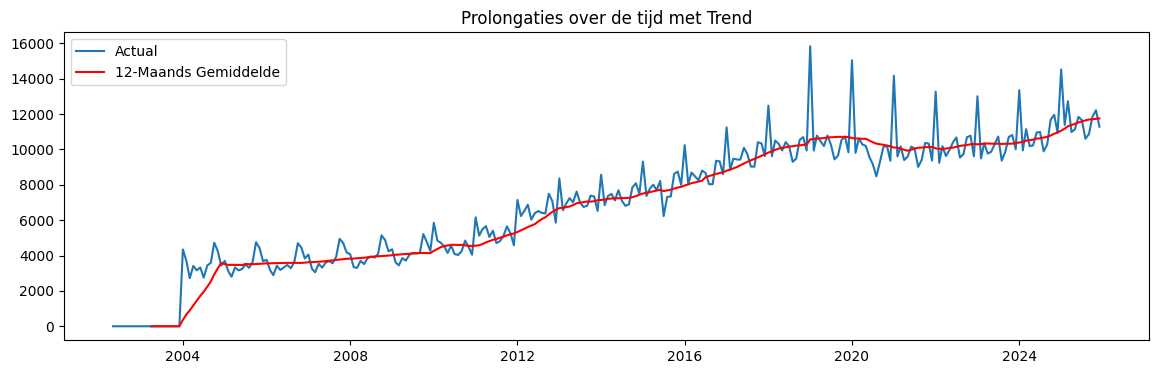

ADF Statistic: -1.915
p-waarde: 0.325
Status: Niet stationair (Je moet 'differencing' toepassen)


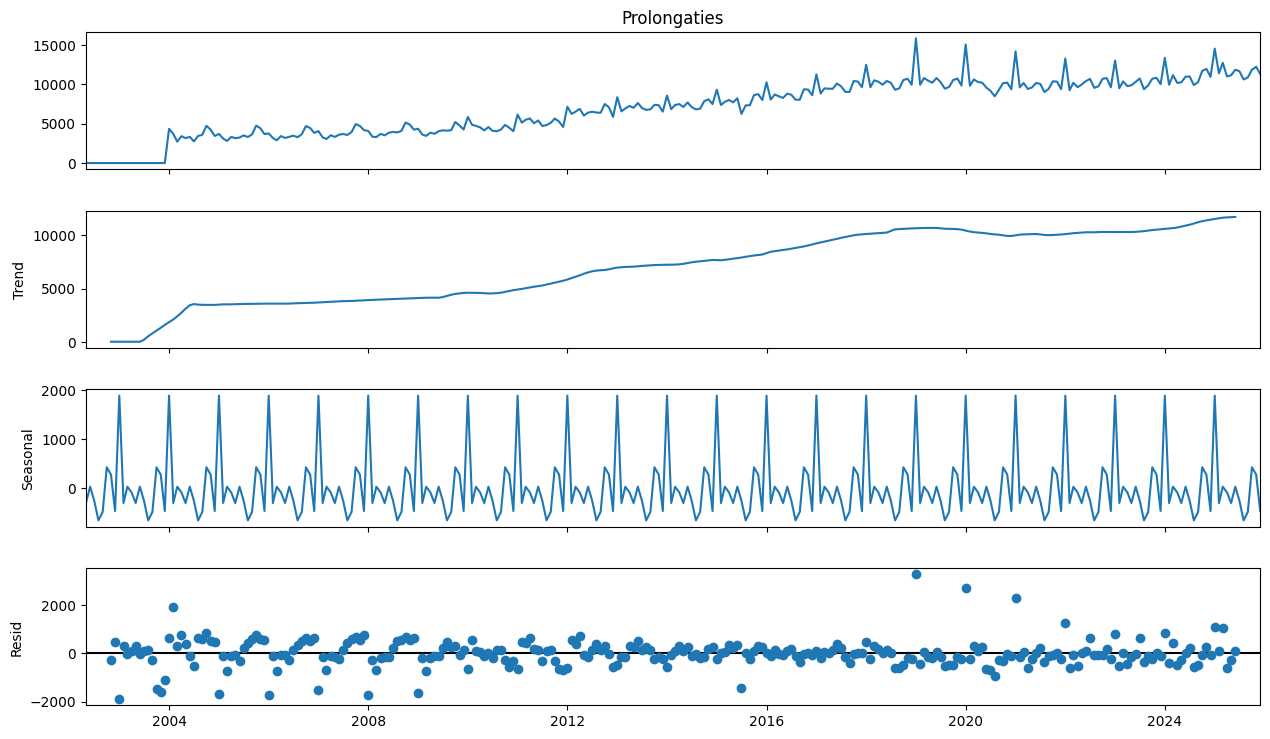

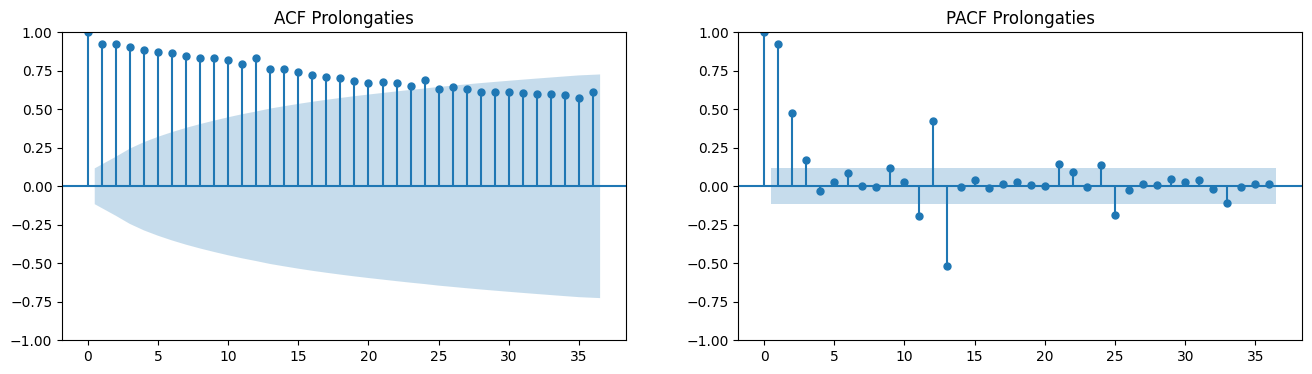

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Groepeer de opgeschoonde data per maand (totaal niveau)
ts_data = df_cleaned.groupby('date')[['Royementen', 'NewBusiness', 'Prolongaties']].sum()

targets = ['Royementen', 'NewBusiness', 'Prolongaties']

for target in targets:
    print(f"\n--- Analyse voor: {target} ---")
    
    # A. Tijdreeks verloop & Voortschrijdend Gemiddelde
    plt.figure(figsize=(14, 4))
    plt.plot(ts_data[target], label='Actual')
    plt.plot(ts_data[target].rolling(window=12).mean(), label='12-Maands Gemiddelde', color='red')
    plt.title(f'{target} over de tijd met Trend')
    plt.legend()
    plt.show()

    # B. Stationariteit Test (ADF)
    result = adfuller(ts_data[target])
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-waarde: {result[1]:.3f}')
    if result[1] <= 0.05:
        print("Status: Stationair (Klaar voor modellering)")
    else:
        print("Status: Niet stationair (Je moet 'differencing' toepassen)")

    # C. Seizoensgebonden Decompositie
    # We gaan uit van een jaarlijkse cyclus (period=12)
    decomp = seasonal_decompose(ts_data[target], model='additive', period=12)
    fig = decomp.plot()
    fig.set_size_inches(14, 8)
    plt.show()

    # D. ACF en PACF Plots (voor modelkeuze)
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(ts_data[target], lags=36, ax=axes[0], title=f'ACF {target}')
    plot_pacf(ts_data[target], lags=36, ax=axes[1], title=f'PACF {target}')
    plt.show()

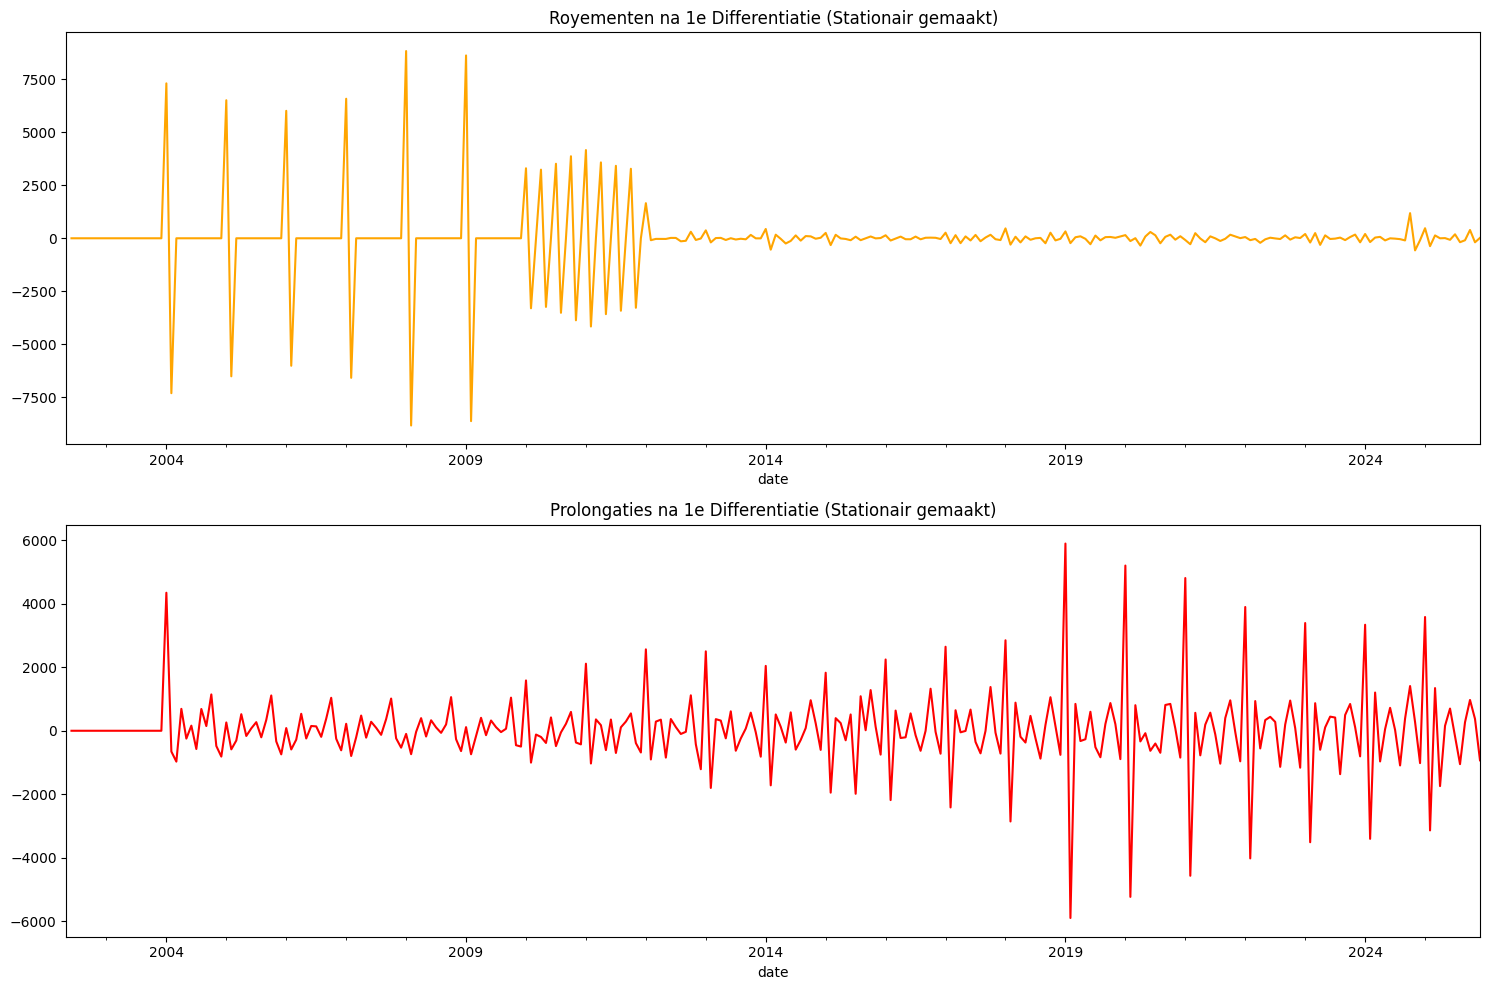

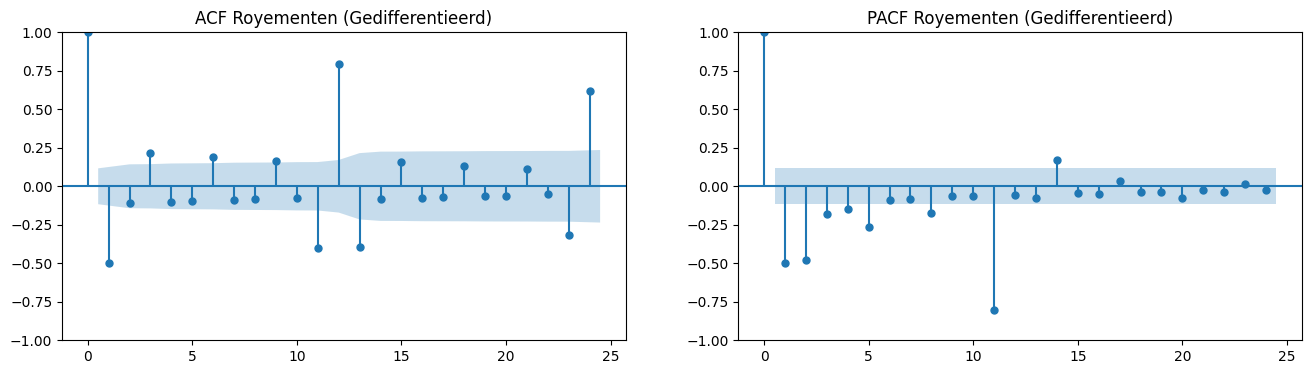

Correlatie tussen de drie hoofd-features:


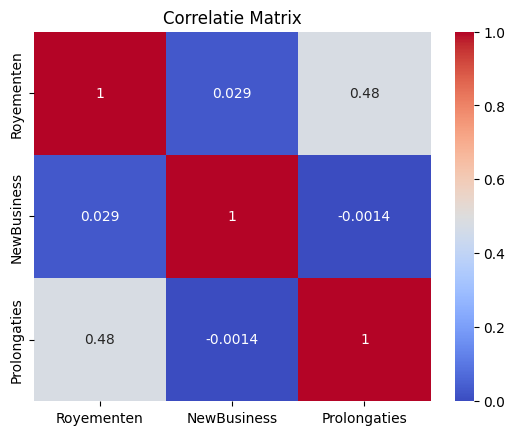

Correlatie tussen NewBusiness (vorige maand) en Royementen (nu): 0.095


In [29]:
# --- STAP 6: Differencing voor Royementen en Prolongaties ---
# We maken nieuwe kolommen aan voor de gedifferentieerde data
ts_df['Royementen_diff'] = ts_df['Royementen'].diff()
ts_df['Prolongaties_diff'] = ts_df['Prolongaties'].diff()

# Visualiseer het effect
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

ts_df['Royementen_diff'].plot(ax=axes[0], title='Royementen na 1e Differentiatie (Stationair gemaakt)', color='orange')
ts_df['Prolongaties_diff'].plot(ax=axes[1], title='Prolongaties na 1e Differentiatie (Stationair gemaakt)', color='red')
plt.tight_layout()
plt.show()

# Controleer ACF/PACF opnieuw voor de gedifferentieerde data
# Dit helpt bij het bepalen van de 'p' en 'q' voor SARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(ts_df['Royementen_diff'].dropna(), lags=24, ax=axes[0], title='ACF Royementen (Gedifferentieerd)')
plot_pacf(ts_df['Royementen_diff'].dropna(), lags=24, ax=axes[1], title='PACF Royementen (Gedifferentieerd)')
plt.show()

# --- STAP 7: Correlatie tussen de targets ---
print("Correlatie tussen de drie hoofd-features:")
correlation = ts_df[['Royementen', 'NewBusiness', 'Prolongaties']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlatie Matrix')
plt.show()

# --- STAP 8: Lag-analyse (Lead-Lag effecten) ---
# Kijken of New Business van 1 maand geleden invloed heeft op Royementen nu
ts_df['NewBusiness_lag1'] = ts_df['NewBusiness'].shift(1)
lag_corr = ts_df[['Royementen', 'NewBusiness_lag1']].corr()
print(f"Correlatie tussen NewBusiness (vorige maand) en Royementen (nu): {lag_corr.iloc[0,1]:.3f}")